In [1]:
!pip install keras
!pip install tensorflow

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Layer,Lambda

In [3]:
data=pd.read_csv(r"C:\Users\prajw\Data Science\Assignments\16 Neural Networks\gas_turbines.csv")

In [4]:
df=data.copy()

In [5]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [6]:
df.shape

(15039, 11)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


In [8]:
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [9]:
corr=df.corr()

<Axes: >

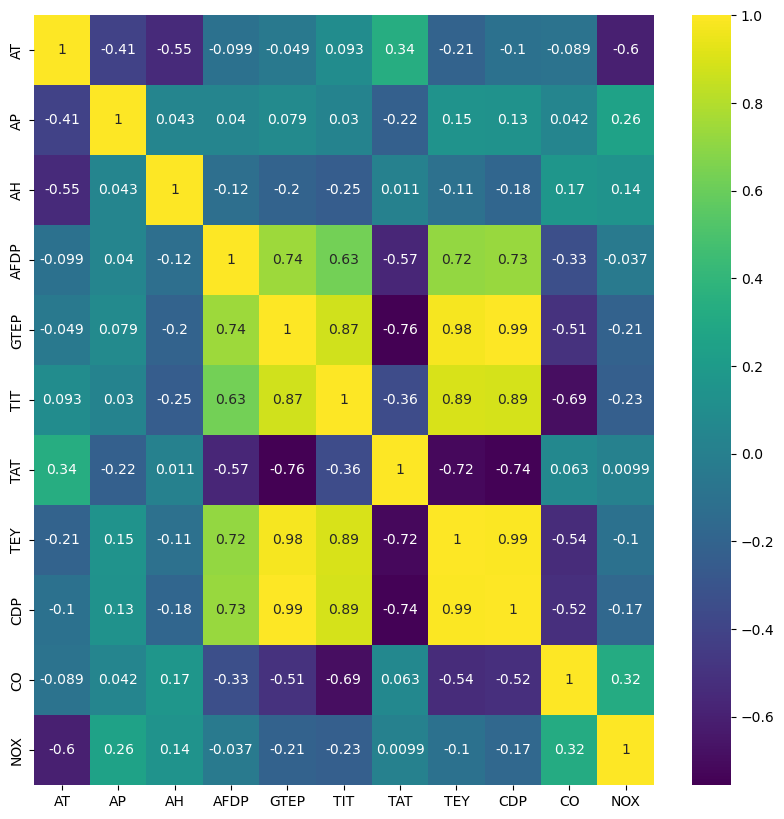

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap="viridis")

In [11]:
dfa=df[df.columns[0:11]]
num_columns=dfa.select_dtypes(exclude='object').columns.tolist()

In [12]:
num_columns

['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']

In [13]:
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
skewness,-0.030710,0.107601,-0.681224,0.315150,0.370987,-1.133744,-1.485524,0.145963,0.263042,6.534577,1.126605
kurtosis,-0.987597,0.424070,-0.282476,0.281642,-0.618358,0.375232,0.847637,-0.487058,-0.589420,82.518116,2.660381


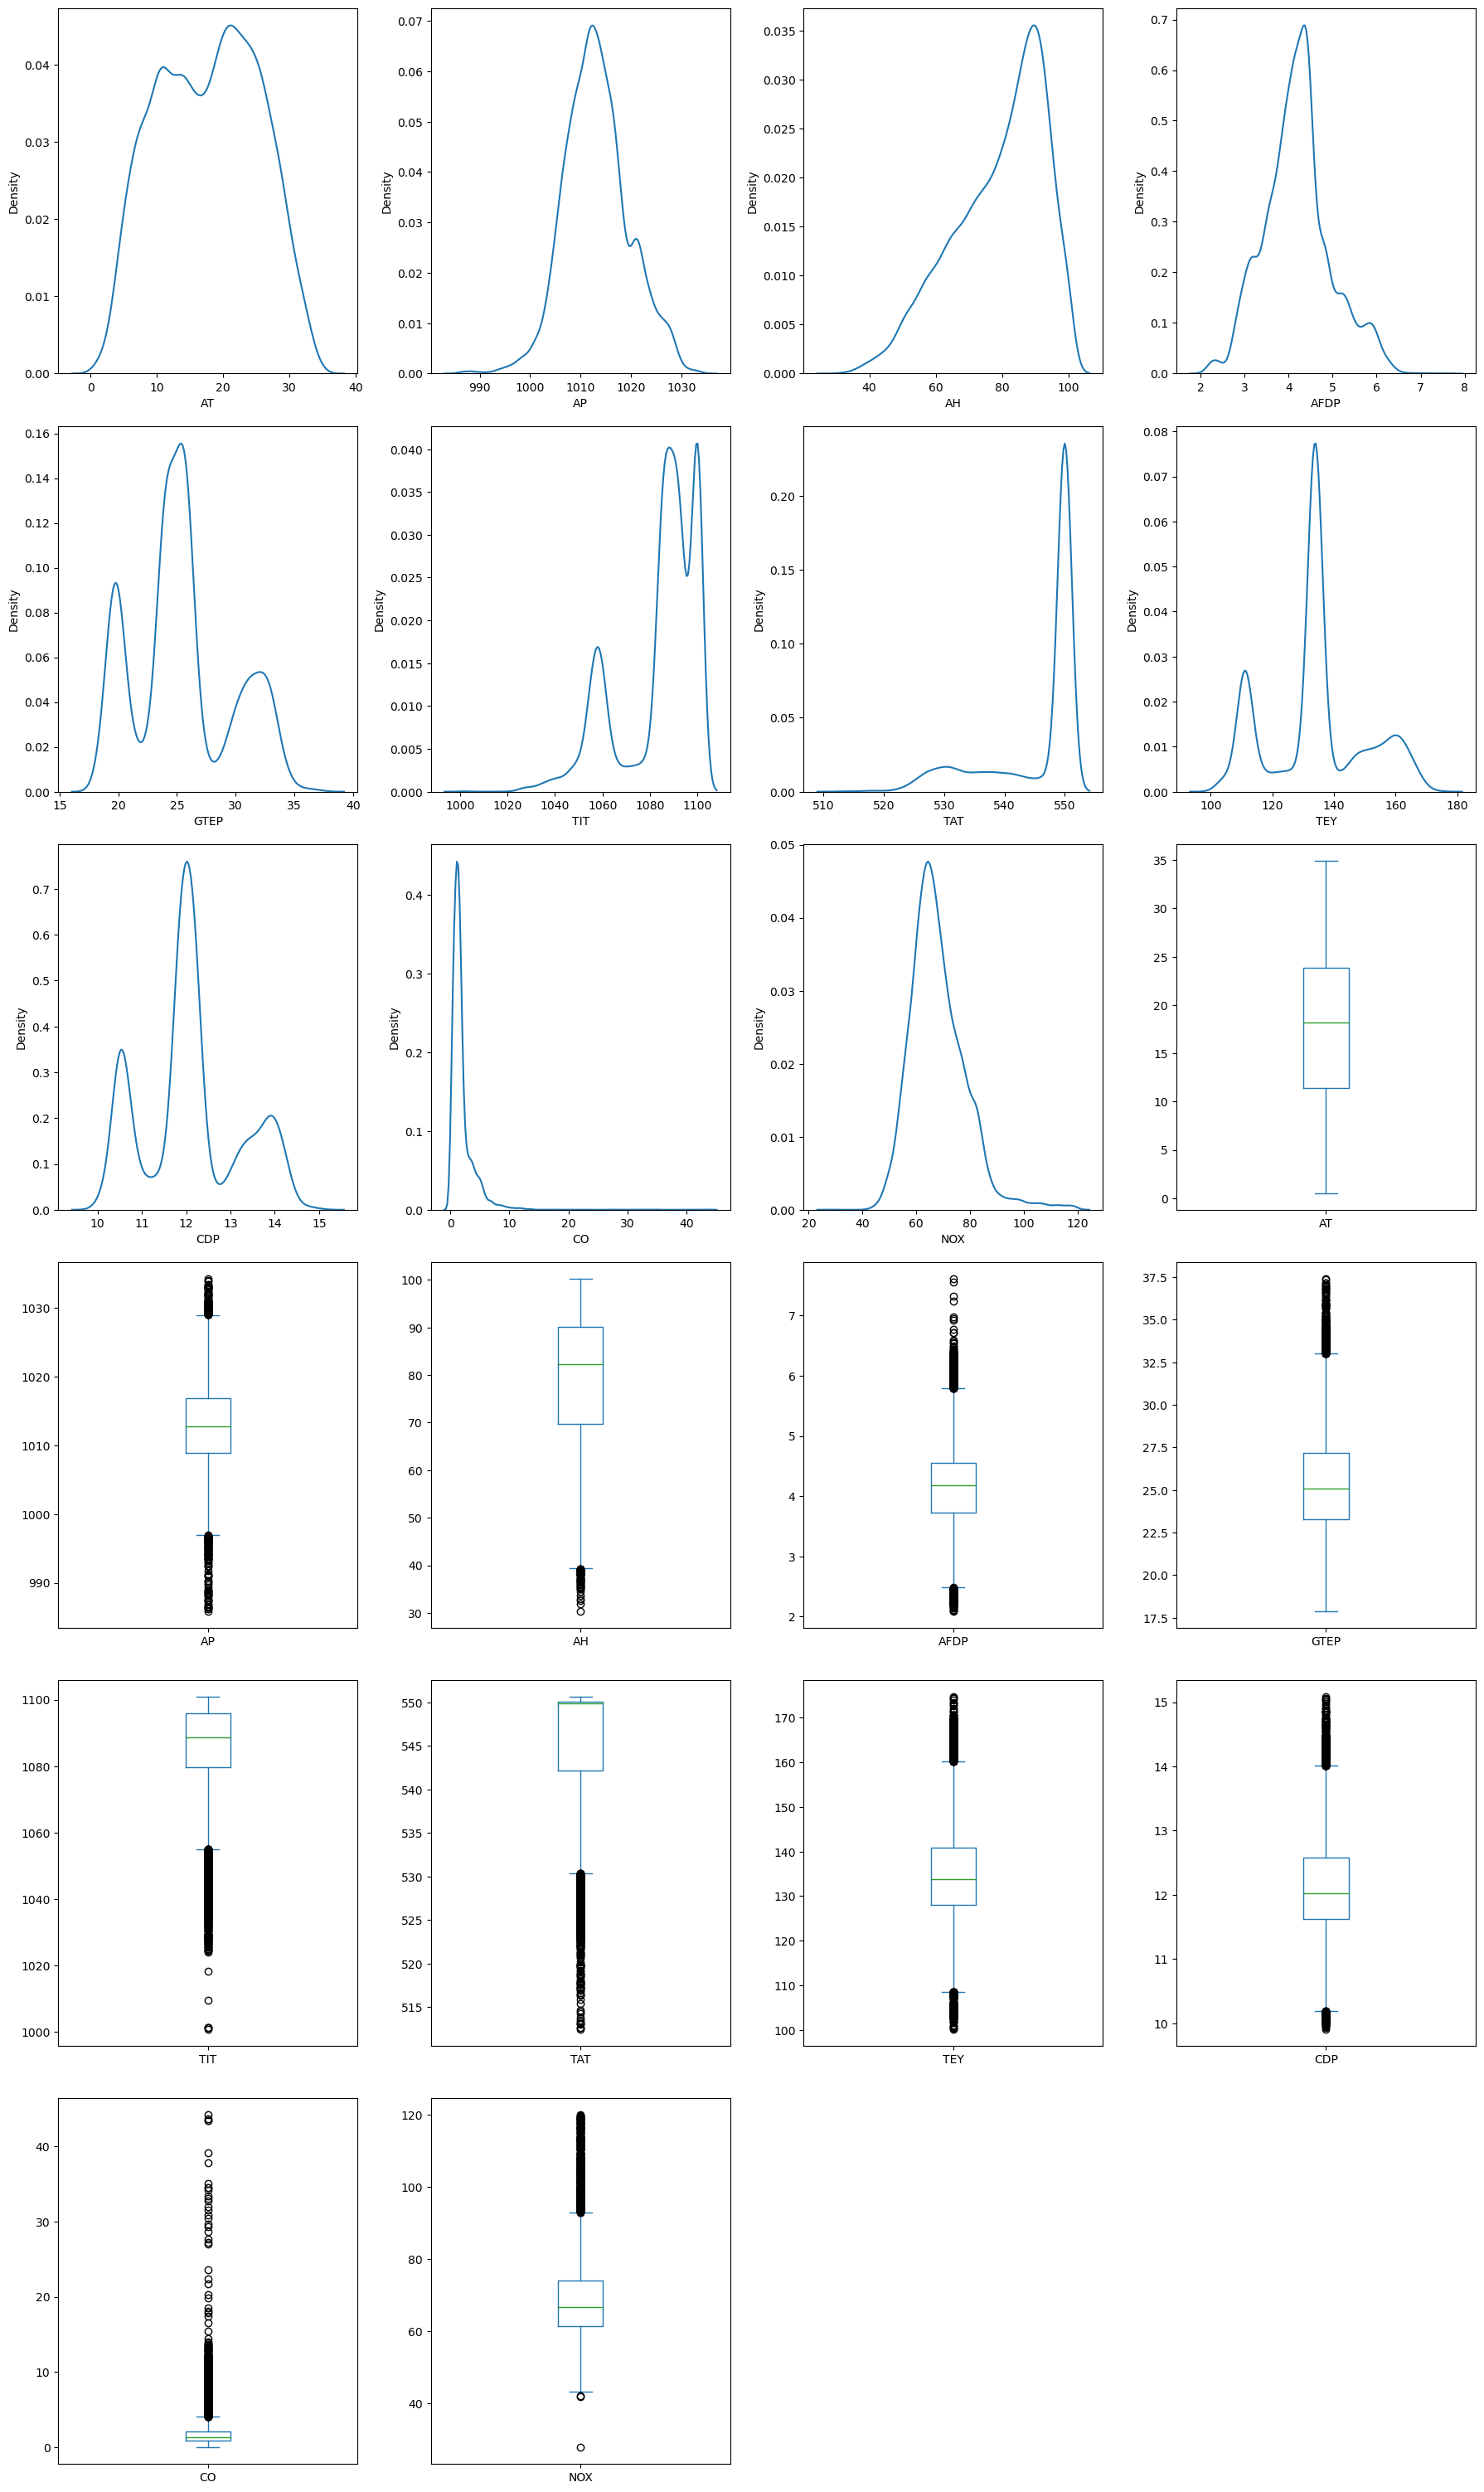

In [14]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col])
    plt.subplot(8,4,i+11)
    df[col].plot.box()
plt.tight_layout()
plt.show()

## Neural Network Model

In [15]:
x=df.columns
x 

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [16]:
sc= StandardScaler()

df=sc.fit_transform(df)
df

array([[-1.4397781 , -0.82664395,  1.28143632, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.44960109, -0.74864748,  1.30456402, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.42042259, -0.99823616,  1.44159024, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.43073409, -0.93583899,  1.33465179, ..., -1.37727349,
         1.35415028,  2.32153907]])

In [17]:
df=pd.DataFrame(data=df, columns=x)
df 

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.231172,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.229909,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.230541,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.229909,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.229909,-1.350985,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,-1.426381,-1.543161,1.145792,1.085751
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,-1.415642,-1.513247,1.293578,1.119943
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,-1.516089,-1.467922,2.695925,2.170062
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,-1.481343,-1.422598,1.924683,2.391165


In [18]:
x=df.iloc[:,[0,1,2,3,4,5,6,8,9,10]]
y=df['TEY']

In [19]:
'''dft=df.drop(columns="TEY",axis=1)
x=np.array(dft.iloc[:,:])
y=np.array(df.iloc[:,7])'''

'dft=df.drop(columns="TEY",axis=1)\nx=np.array(dft.iloc[:,:])\ny=np.array(df.iloc[:,7])'

In [20]:
'''def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)'''

'def norm_func(i):\n    x=(i-i.min())/(i.max()-i.min())\n    return (x)'

In [21]:
# x_norm=norm_func(x)

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,shuffle=True)

In [24]:
'''model=Sequential()
model.add(Dense(12, input_dim=10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=150, batch_size=10)'''

"model=Sequential()\nmodel.add(Dense(12, input_dim=10, activation='relu'))\nmodel.add(Dense(8, activation='relu'))\nmodel.add(Dense(1, activation='sigmoid'))\n\nmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])\n\nmodel.fit(x_train, y_train, epochs=150, batch_size=10)"

In [25]:
#Initialize ann model
ann = Sequential()

#Add hidden layers
ann.add(Dense(units=30, activation='sigmoid'))
ann.add(Dense(units=20, activation='relu'))

#Add output layer
ann.add(Dense(units=1))

#Establish the connection between layers
ann.compile(optimizer='adam',loss='mean_squared_error')

#Fit the data 
ann.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)



Epoch 1/50

376/376 [==============================] - 1s 2ms/step - loss: 0.0705 - val_loss: 0.0051
Epoch 2/50
376/376 [==============================] - 1s 2ms/step - loss: 0.0043 - val_loss: 0.0037
Epoch 3/50
376/376 [==============================] - 1s 2ms/step - loss: 0.0034 - val_loss: 0.0031
Epoch 4/50
376/376 [==============================] - 1s 2ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 5/50
376/376 [==============================] - 1s 2ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 6/50
376/376 [==============================] - 1s 2ms/step - loss: 0.0027 - val_loss: 0.0024
Epoch 7/50
376/376 [==============================] - 1s 2ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 8/50
376/376 [==============================] - 1s 2ms/step - loss: 0.0024 - val_loss: 0.0026
Epoch 9/50
376/376 [==============================] - 1s 2ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 10/50
376/376 [==============================] - 1s 2ms/step - loss: 0.0024 - val_loss: 0.0

<Axes: >

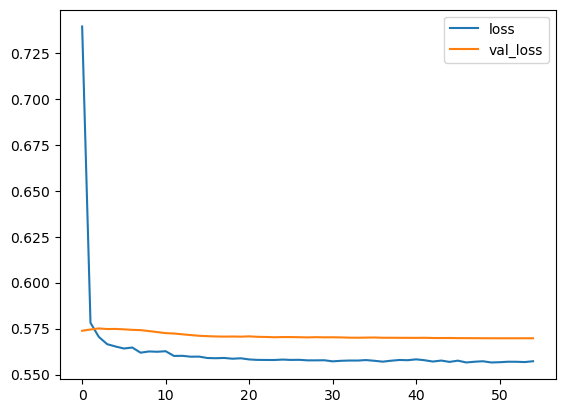

In [37]:
val_loss = pd.DataFrame(ann.history.history)
val_loss.plot()

In [27]:
ypred = ann.predict(x_test)
ypred

94/94 [==============================] - 0s 1ms/step


array([[-1.4273872 ],
       [ 0.06679565],
       [-1.5719757 ],
       ...,
       [ 1.605454  ],
       [ 0.34822312],
       [-0.01952272]], dtype=float32)

In [28]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
early = EarlyStopping(monitor='val_loss',mode='min', patience=25)

In [30]:
ann = Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dense(units=20, activation='relu'))
ann.add(Dense(units=1, activation='tanh'))
ann.compile(optimizer='adam', loss = 'mse')

ann.fit(x_train,y_train, validation_data=(x_test,y_test), callbacks=[early], epochs=50)

Epoch 1/50
376/376 [==============================] - 1s 2ms/step - loss: 0.2201 - val_loss: 0.1483
Epoch 2/50
376/376 [==============================] - 1s 2ms/step - loss: 0.1384 - val_loss: 0.1429
Epoch 3/50
376/376 [==============================] - 1s 2ms/step - loss: 0.1354 - val_loss: 0.1417
Epoch 4/50
376/376 [==============================] - 1s 2ms/step - loss: 0.1344 - val_loss: 0.1408
Epoch 5/50
376/376 [==============================] - 1s 2ms/step - loss: 0.1337 - val_loss: 0.1401
Epoch 6/50
376/376 [==============================] - 1s 2ms/step - loss: 0.1333 - val_loss: 0.1399
Epoch 7/50
376/376 [==============================] - 1s 2ms/step - loss: 0.1330 - val_loss: 0.1395
Epoch 8/50
376/376 [==============================] - 1s 2ms/step - loss: 0.1327 - val_loss: 0.1398
Epoch 9/50
376/376 [==============================] - 1s 2ms/step - loss: 0.1326 - val_loss: 0.1391
Epoch 10/50
376/376 [==============================] - 1s 2ms/step - loss: 0.1323 - val_loss: 0.1391

<Axes: >

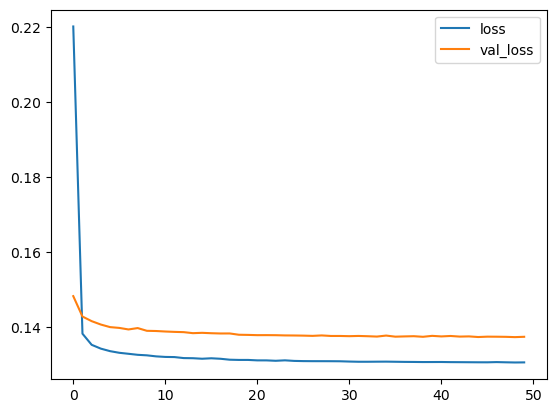

In [31]:
early_loss = pd.DataFrame(ann.history.history)

early_loss.plot()

In [32]:
ann = Sequential()

ann.add(Dense(units=35, activation='relu'))
ann.add(Dropout(rate=0.45))

ann.add(Dense(units=25, activation='relu'))
ann.add(Dropout(rate=0.4))

ann.add(Dense(units=1, activation='tanh'))
ann.compile(optimizer='adam',loss='mse')
ann.fit(x_train,y_train, validation_data=(x_test,y_test), epochs = 50)

Epoch 1/50
376/376 [==============================] - 1s 2ms/step - loss: 0.3085 - val_loss: 0.1464
Epoch 2/50
376/376 [==============================] - 1s 2ms/step - loss: 0.1649 - val_loss: 0.1435
Epoch 3/50
376/376 [==============================] - 1s 2ms/step - loss: 0.1500 - val_loss: 0.1438
Epoch 4/50
376/376 [==============================] - 1s 2ms/step - loss: 0.1442 - val_loss: 0.1438
Epoch 5/50
376/376 [==============================] - 1s 2ms/step - loss: 0.1420 - val_loss: 0.1437
Epoch 6/50
376/376 [==============================] - 1s 2ms/step - loss: 0.1411 - val_loss: 0.1434
Epoch 7/50
376/376 [==============================] - 1s 2ms/step - loss: 0.1404 - val_loss: 0.1432
Epoch 8/50
376/376 [==============================] - 1s 2ms/step - loss: 0.1394 - val_loss: 0.1425
Epoch 9/50
376/376 [==============================] - 1s 2ms/step - loss: 0.1393 - val_loss: 0.1426
Epoch 10/50
376/376 [==============================] - 1s 2ms/step - loss: 0.1387 - val_loss: 0.1421

<Axes: >

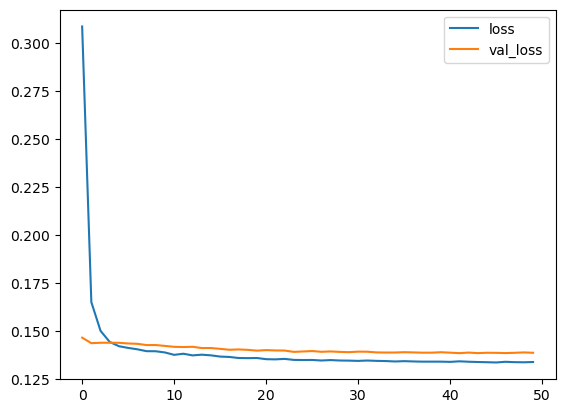

In [33]:
drop_loss = pd.DataFrame(ann.history.history)
drop_loss.plot()

In [34]:
ann = Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=20, activation='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=1, activation='sigmoid'))
ann.compile(optimizer='adam',loss='mse')
ann.fit(x_train,y_train, validation_data=(x_test,y_test),callbacks=[early], epochs = 55)

Epoch 1/55
376/376 [==============================] - 1s 2ms/step - loss: 0.7394 - val_loss: 0.5738
Epoch 2/55
376/376 [==============================] - 1s 2ms/step - loss: 0.5781 - val_loss: 0.5745
Epoch 3/55
376/376 [==============================] - 1s 2ms/step - loss: 0.5705 - val_loss: 0.5751
Epoch 4/55
376/376 [==============================] - 1s 2ms/step - loss: 0.5665 - val_loss: 0.5748
Epoch 5/55
376/376 [==============================] - 1s 2ms/step - loss: 0.5653 - val_loss: 0.5748
Epoch 6/55
376/376 [==============================] - 1s 2ms/step - loss: 0.5642 - val_loss: 0.5746
Epoch 7/55
376/376 [==============================] - 1s 2ms/step - loss: 0.5647 - val_loss: 0.5743
Epoch 8/55
376/376 [==============================] - 1s 2ms/step - loss: 0.5619 - val_loss: 0.5742
Epoch 9/55
376/376 [==============================] - 1s 2ms/step - loss: 0.5626 - val_loss: 0.5737
Epoch 10/55
376/376 [==============================] - 1s 2ms/step - loss: 0.5624 - val_loss: 0.5731

<Axes: >

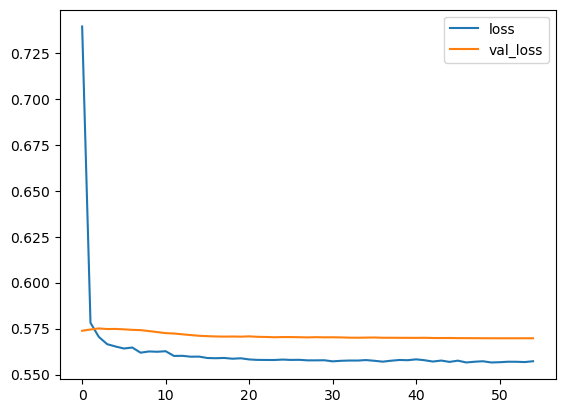

In [35]:
de_loss = pd.DataFrame(ann.history.history)
de_loss.plot()

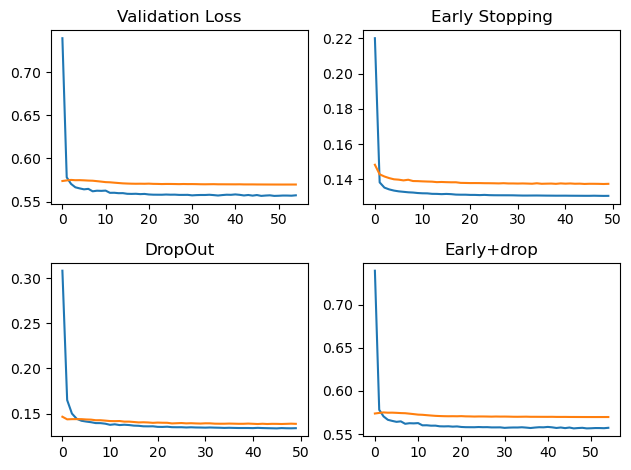

In [38]:
plt.subplot(2,2,1)
plt.plot(val_loss)
plt.title('Validation Loss')

plt.subplot(2,2,2)
plt.plot(early_loss)
plt.title('Early Stopping')

plt.subplot(2,2,3)
plt.plot(drop_loss)
plt.title('DropOut')

plt.subplot(2,2,4)
plt.plot(de_loss)
plt.title('Early+drop')

plt.tight_layout()